This is called demodulation 2 because I'm trying to figure out units. 

Mira

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import seaborn as sns
import sys
import numpy as np
import scipy.optimize as op
from scipy.optimize import curve_fit

sns.set_palette("PuBuGn_d",15)
sns.set_style("whitegrid")
import emcee

from scipy.signal import hilbert, chirp, butter, freqz, lfilter

In [20]:
file=open( '../../data/raw_data/20160923_1613_20160923_400aperture_2cms_chopperon.pkl' , 'rb')
#file=open( '../../data/raw_data/no_absorber_on_septum_p2apertureandfoam_chopped.pkl' , 'rb')
d=pickle.load(file, encoding = "latin1")
file.close()

/Users/Lab/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


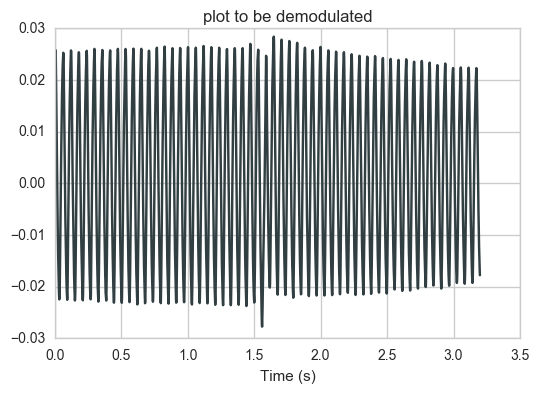

In [21]:
D = (d['sig0F']) 
i = 11
Nsize = 2**i
dt=(1/(d['sample freq']))
t = dt*np.arange(Nsize)

total_s = (d['samples requested'])
startpt = ((total_s - Nsize)/2) 
endpt = startpt + Nsize

v=(d['speed'])
x = v*t
dx = dt*v
  
F = D[startpt:endpt]
pl.plot(t, F)
pl.title('plot to be demodulated')
pl.xlabel('Time (s)')


sample frequency is  640.0


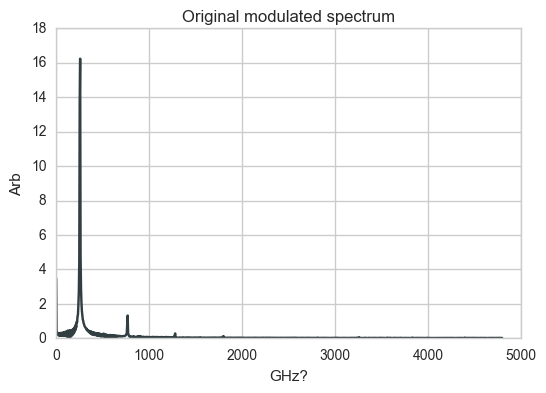

In [23]:
A = F
S = np.fft.rfft(A)
S = S[0:-1]
u = np.abs(S)
dNu = 1/(Nsize*dx)
Nu = dNu*np.arange(Nsize/2)

pl.plot(300*Nu, u)
pl.title('Original modulated spectrum')
#pl.xlim(0,2000)
pl.xlabel('GHz?')
pl.ylabel('Arb')
fs = d['sample freq']
print ('sample frequency is ', fs)


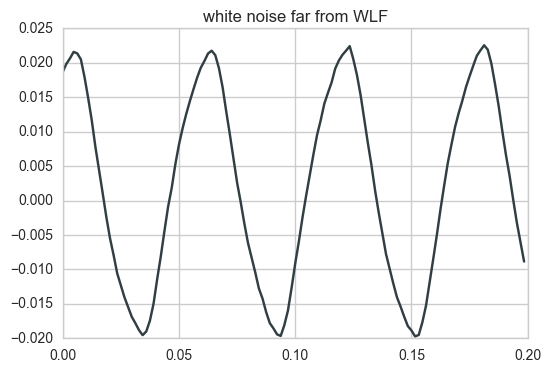

In [24]:
#Find frequency of carrier wave?
K1 = (d['sig0F']) 
i = 7
Nsize1 = 2**i
dt1=(1/(d['sample freq']))
t1 = dt1*np.arange(Nsize1)

startpt = 0
endpt = startpt + Nsize1

v1=(d['speed'])
x1 = v1*t1
dx1 = dt*v1
  
K1 = D[startpt:endpt]
pl.plot(t1, K1)
pl.title('white noise far from WLF')

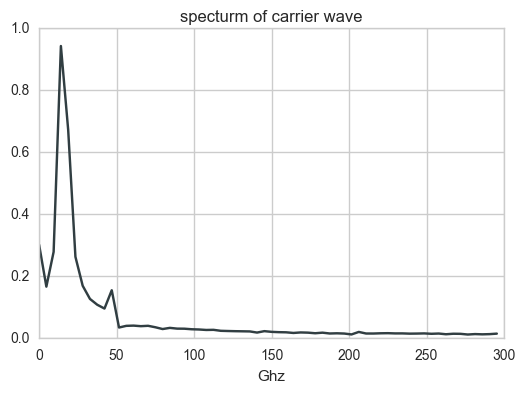

In [25]:
S1 = np.fft.rfft(K1)
S1 = S1[0:-1]
u1 = np.abs(S1)
dNu1 = 1/(Nsize1*dx1)
Nu1 = dNu*np.arange(Nsize1/2)

pl.plot(300*Nu1, u1)
pl.xlabel('Ghz')
pl.title('specturm of carrier wave')

In [26]:
#function
def lowpass(cutoff, fs, order = 5):
    nyq = .5*fs #make half cycles
    n_cutoff = cutoff/nyq #wn from 0 to 1
    b,a = butter(order, n_cutoff, btype = 'low', analog = False)
    return b,a

def lowpass_filter(data, cutoff, fs, order):
    b,a = lowpass(cutoff, fs, order = order)
    y =lfilter(b,a,data)
    return y

In [27]:
#Filter constants
order = 6
fs = 640 #what are the units? Hz (not GHz)? If so, how to make a filter low enough?
cutoff = 100 #max cutoff is 320? (nyquist frequency)
data = A

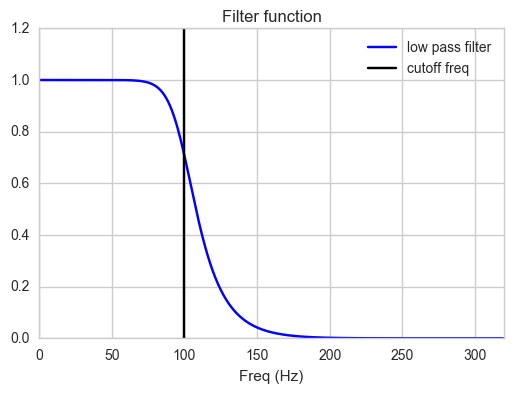

In [28]:
#plotting filter
b, a = lowpass(cutoff, fs, order) #filter coefficients
#print 'b is: ', b
#print 'a is: ', a

w,h = freqz(b,a,worN=None)
#print 'w is: ', w
#print 'h is: ', h

pl.plot(.5*fs*w/np.pi, np.abs(h), color = 'b', label = 'low pass filter')
pl.xlim(0, 0.5*fs)
pl.axvline(cutoff, color='k', label = 'cutoff freq')
pl.xlabel('Freq (Hz)')
pl.title('Filter function')
pl.legend()

In [29]:
#filtered data?
y = lowpass_filter(data, cutoff, fs, order)

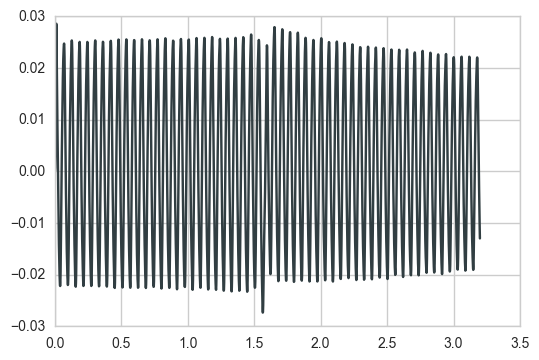

In [30]:
pl.plot(t, y)

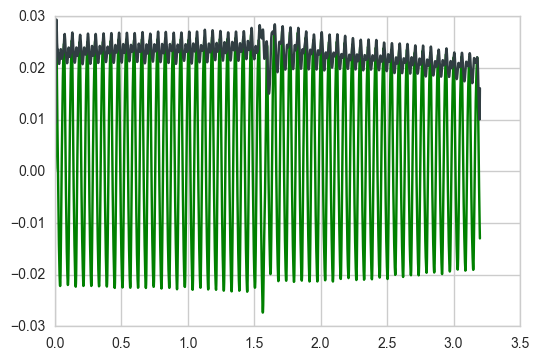

In [31]:
Signal = hilbert(y)
amp_envelope = np.abs(Signal)
pl.plot(t,y, 'g-', label = 'modulated')
pl.plot(t, amp_envelope, label = 'envelope')
#Is that the envelope?

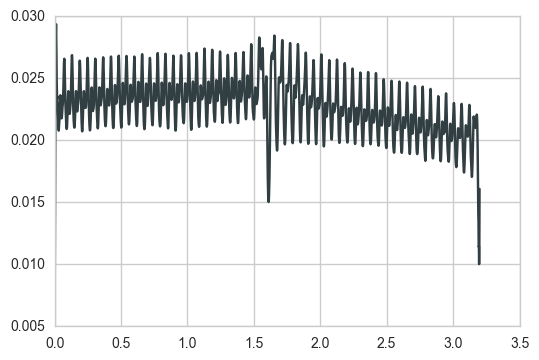

In [32]:
pl.plot(t, amp_envelope)

(0, 200)

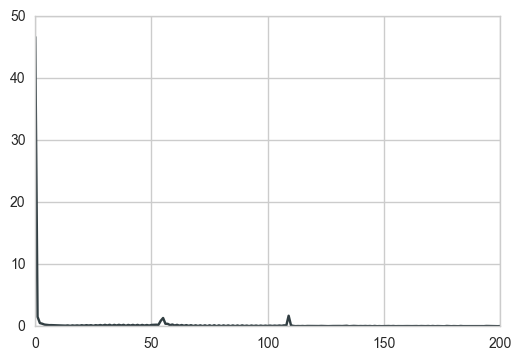

In [33]:
S2 = np.fft.rfft(amp_envelope)
S2 = S2[0:-1]
pl.plot(np.abs(S2))
pl.xlim(0, 200)

(0, 50)

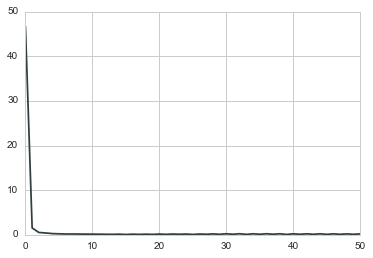

In [35]:
S2 = np.fft.rfft(amp_envelope)
S2 = S2[0:-1]
pl.plot(np.abs(S2))
pl.xlim(0,50)